## <p style="text-align: center;">**Laboratory Session** : April 9, 2023</p>
#### <p style="text-align: center;">Exercises due on : April 24, 2023</p>

**Student**: Cavezza Lorenzo <br>
**Matricola**: 2130648

# 
**Exercise 1**# - NYC bike-sharing data
The repository https://drive.google.com/drive/folders/1NESuaJ5yGIrAli1TgrpnK5hnoxGsMi3h?
usp=sharing contains bike-sharing data provided by New York City, Citi Bike1 sharing system. The
data (in csv format) is structured as follows
- Trip duration (in seconds)
- Start Time and date
- Stop Time and date
- Start Station ID, name, latitude and longitude
- End Station ID, name, latitude and longitude
- Bike ID
- User Type (Customer or Subscriber )
- Birth’s Year
- Gender (0=unknown; 1=male; 2=female)

In [250]:
library("glue")
library("lubridate")
library(ggplot2)
library(tidyverse)

**1)** Read the data and import in a data.frame or tibble structure 

**2)** Merge the five data frames in an unique structure

In [251]:
file<-data.frame()
for (i in 2:6){
file<-rbind(file,read.csv(glue("JC-20190{i}-citibike-tripdata.csv")))
}

**3)** Check for missing data and remove it, if any

In [252]:
file<-na.omit(file)

**4.1)** Compute the average and the median trip duration in minutes

In [253]:
mean_Tduration<-mean(file[,1])
median_Tduration<-median(file[,1])
print(glue("The mean time duration is: {mean_Tduration} or {seconds_to_period(mean_Tduration)}"))
print(glue("The median time duration is: {median_Tduration} or {seconds_to_period(median_Tduration)}"))

The mean time duration is: 768.642766194493 or 12M 48.6427661944931S
The median time duration is: 341 or 5M 41S


**4.2)** Evaluate the minimum and maximum trip duration; does that sound like a reasonable value?

In [254]:
max_Tduration<-seconds_to_period(max(file[,1]))
min_Tduration<-seconds_to_period(min(file[,1]))
cat(paste(glue("The max time duration is: {max_Tduration}"),"\n",glue("The min time duration is: {min_Tduration}"), "\n","\n"
               ,"The min time could be reasonable if someone took the bike and quickly changed idea,","\n"
               ,"the maximum seems rather unlikely, it's probably due to a malfunction."))

The max time duration is: 20d 0H 17M 0S 
 The min time duration is: 1M 1S 
 
 The min time could be reasonable if someone took the bike and quickly changed idea, 
 the maximum seems rather unlikely, it's probably due to a malfunction.

**4.3)** Repeat the calculation of the average (and the median) trip duration by excluding trips longer than
3 hours. Next, evaluate the number of skimmed entries

In [255]:
file_excl3<-file[,1][file[,1]<(180*60)]
skimmed_entries<-length(file[,1][file[,1]>(180*60)])
mean_Tduration3<-mean(file_excl3)
median_Tduration3<-median(file_excl3)

cat(paste(glue("The mean time duration is: {mean_Tduration3} or {seconds_to_period(mean_Tduration3)}"),"\n",
          glue("The median time duration is: {median_Tduration3} or {seconds_to_period(median_Tduration3)}"), "\n"
               ,glue("The number of skimmed entries is: {skimmed_entries}"),"\n","\n",
         "As we can see the mean dropped by 3 mins while the median barely changed, this means we removed the outliers of the trip duration distribution"))

The mean time duration is: 553.31404458514 or 9M 13.3140445851401S 
 The median time duration is: 340 or 5M 40S 
 The number of skimmed entries is: 427 
 
 As we can see the mean dropped by 3 mins while the median barely changed, this means we removed the outliers of the trip duration distribution

**4.4)** Plot the distribution of trip duration after the skimming of the previous point

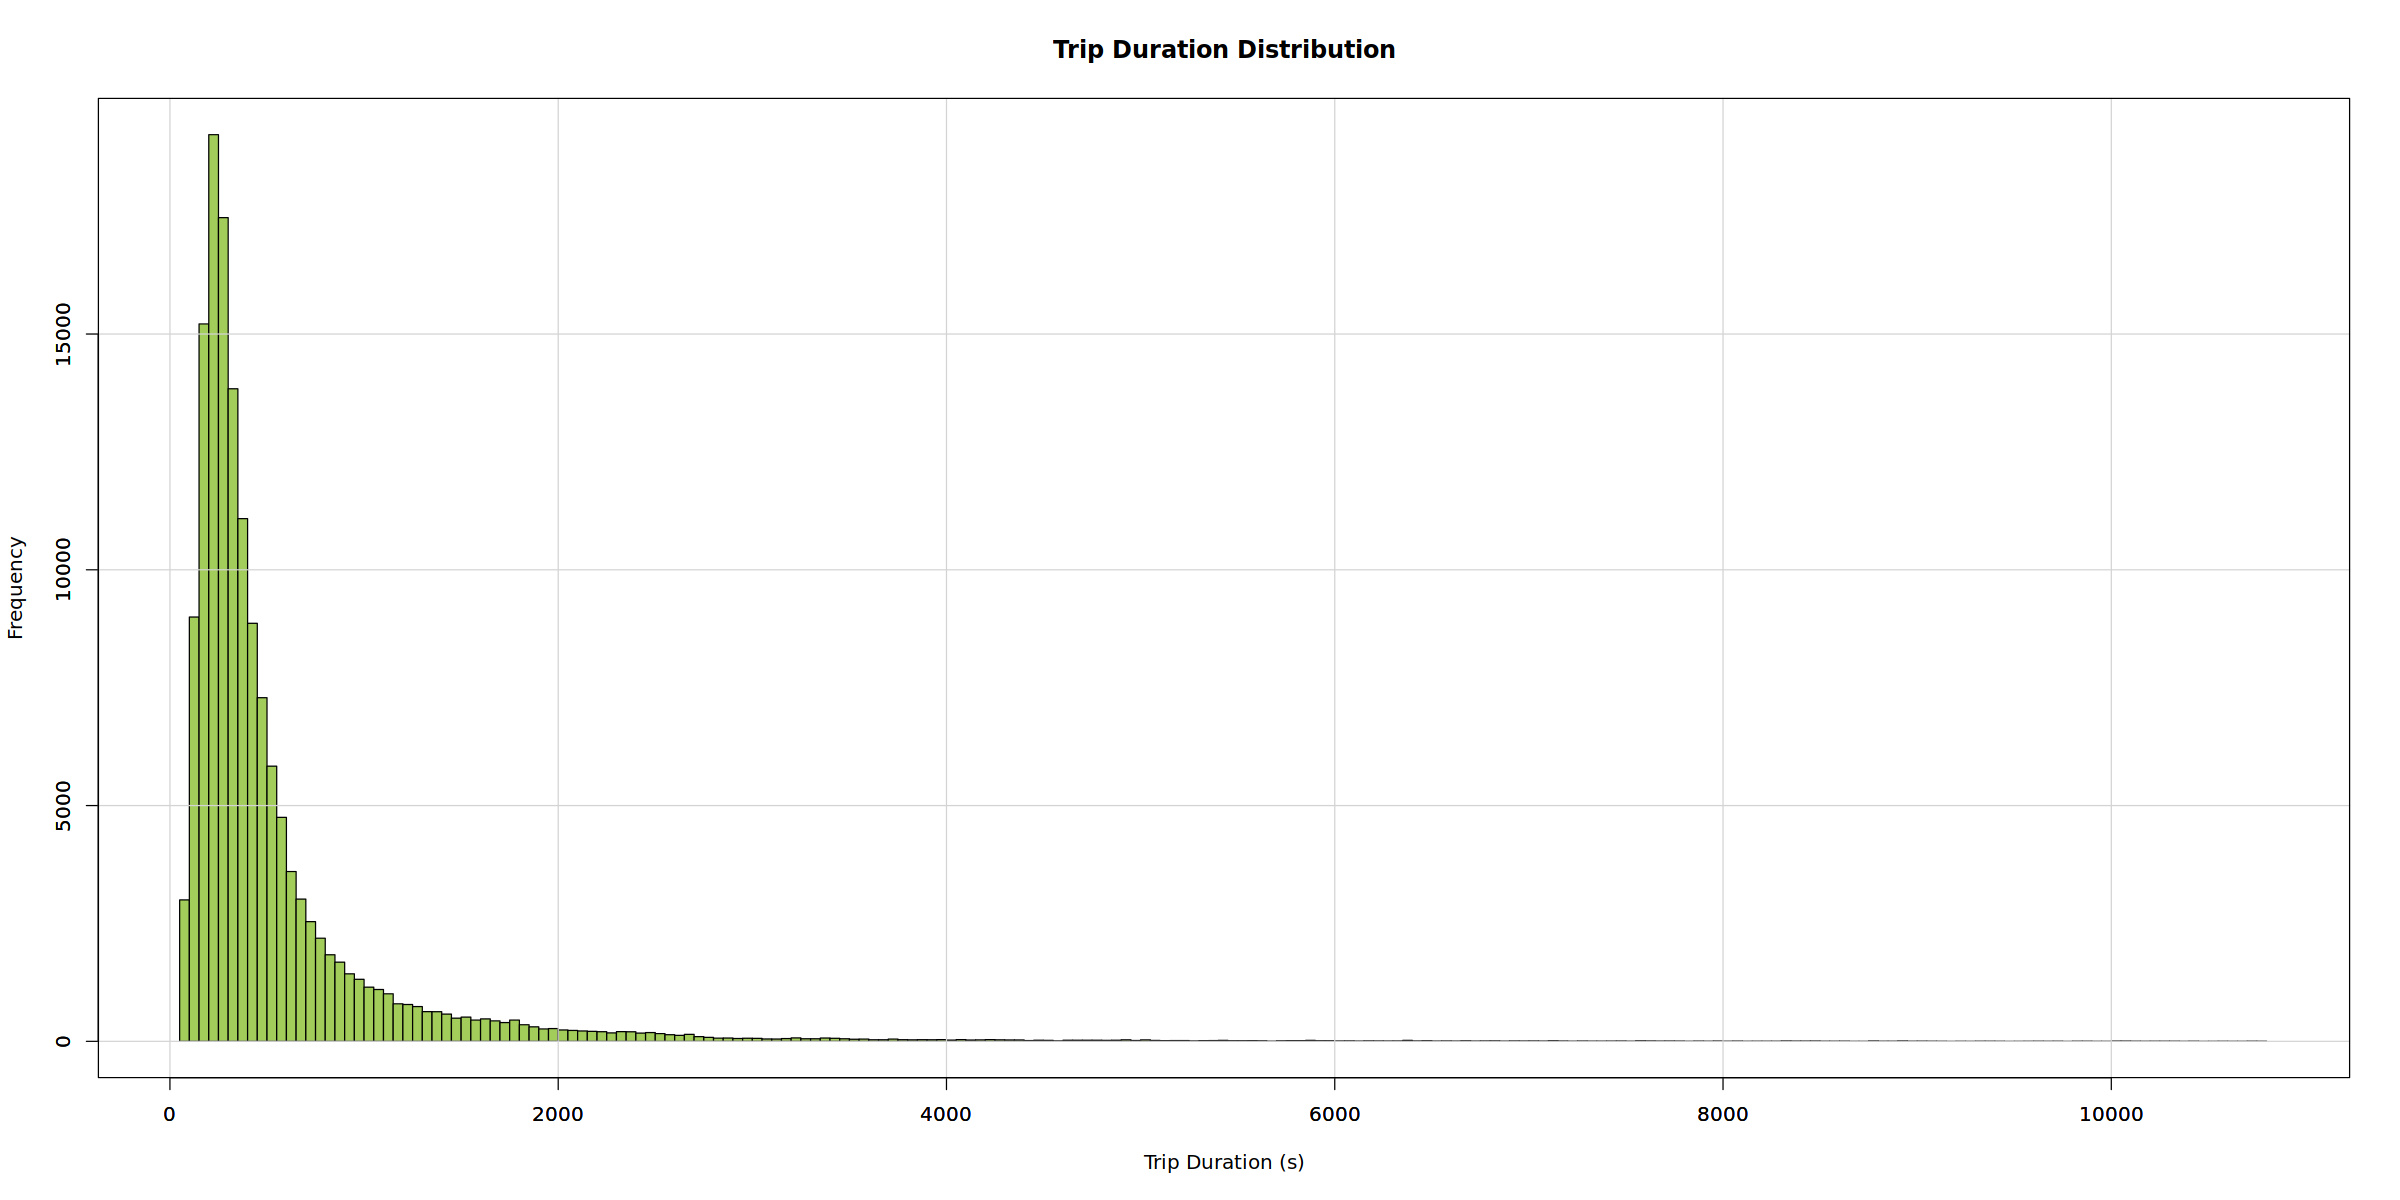

In [256]:
options(repr.plot.width = 20, repr.plot.height = 10)
hist(x=file_excl3, main="Trip Duration Distribution", xlim=c(min(file_excl3),max(file_excl3)),
     breaks=300, col="darkolivegreen3", xlab="Trip Duration (s)")
axis(1, tck=1, col.ticks="light gray")
axis(2, tck=1, col.ticks="light gray")
box()

**5)** Plot the monthly average trip duration

In [257]:
fileMonth<-cbind(file[,1],months(strptime(file[,1:2][,2],"%Y-%m-%d %H:%M:%S"),abbreviate=TRUE))
Months<-month.abb[2:6]
Averages<-c()

for (m in Months) {
Averages<-c(Averages,mean(as.integer(subset(fileMonth[,1], fileMonth[,2]==m))))
    }
month_avg=data.frame(Months,Averages)

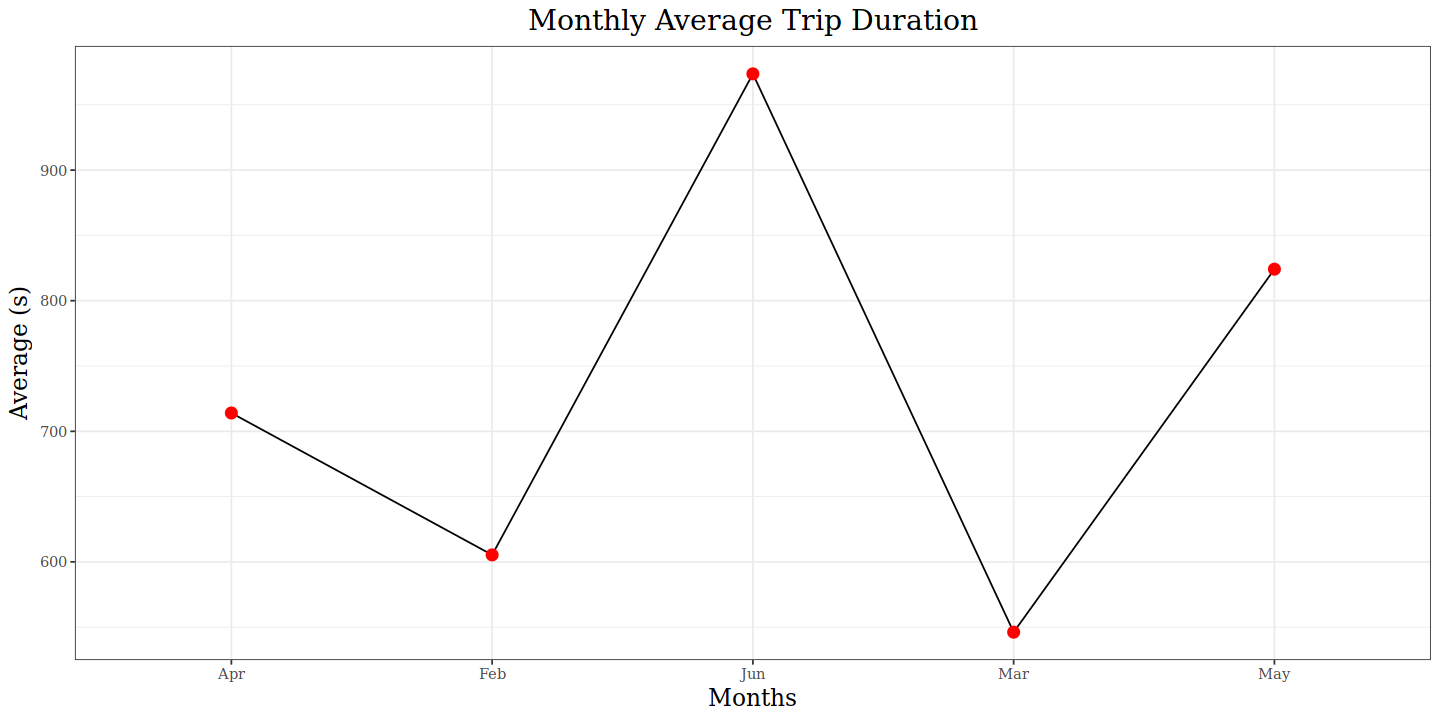

In [258]:
options(repr.plot.width = 12, repr.plot.height =6)


p<-ggplot(data=month_avg, aes(x=Months, y=Averages, group=1)) +
  geom_line()+
  geom_point(color='red',size=3)+
labs(
title="Monthly Average Trip Duration",
x="Months",
y="Average (s)"
)

p+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14),
legend.text=element_text(size=14),legend.title=element_text(size=14))+theme(text = element_text(family = "Times New Roman"))

**6.1)** Plot the number of rides per day

In [259]:
filedays<-data.frame(cbind(fileMonth,format(strptime(file[,1:2][,2],"%Y-%m-%d %H:%M:%S"), format = "%d")))

In [260]:
days_counted<-data.frame()
for (m in Months){
mo<-subset(filedays[,c(3)], fileMonth[,2]==m)
days_counted<-rbind(days_counted,data.frame(mo) %>% count(mo))

    }
months <- c("Feb","Mar","Apr","May","Jun")
months<-rep(months, c(28,31,30,31,30))
days_counted<-cbind(days_counted,months)

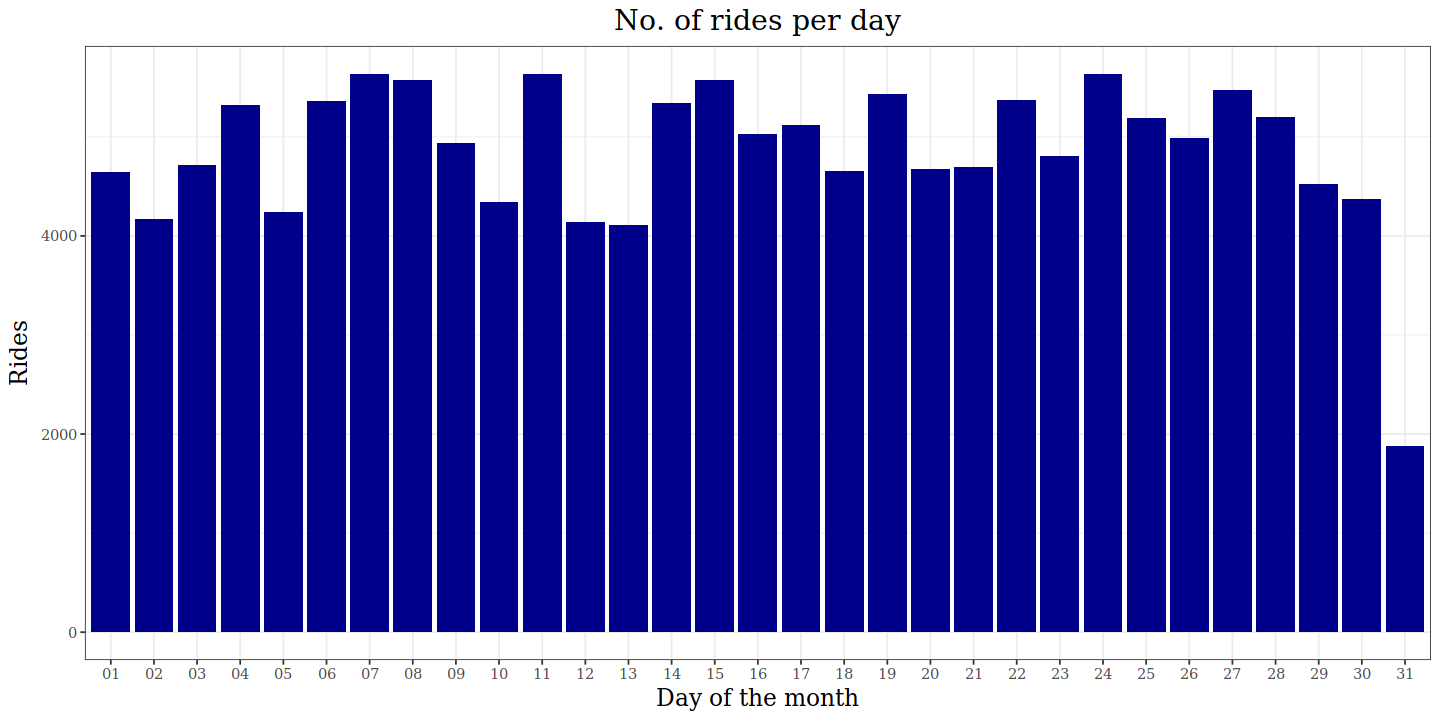

In [261]:



yvalues<-days_counted[,2]
xvalues<-1:length(yvalues)
data<-data.frame(xvalues,yvalues)

options(repr.plot.width = 12,repr.plot.height = 6)
p<-ggplot(days_counted, aes(x=mo, y=n)) + 
  geom_bar(fill="darkblue",stat = "identity")+
labs(
title="No. of rides per day",
y="Rides",
x="Day of the month"
)
p+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14),
 legend.text=element_text(size=14),legend.title=element_text(size=14))+theme(text = element_text(family = "Times New Roman"))


**6.2)** Plot the hourly distribution on weekdays and on weekends

In [262]:
filehours<-cbind(file[,1],weekdays(strptime(file[,1:2][,2],"%Y-%m-%d %H:%M:%S"),abbreviate=TRUE),
                 format(strptime(file[,1:2][,2],"%Y-%m-%d %H:%M:%S"), format = "%H"))
filehours<-data.frame(filehours)

filehours_weekend<-rbind(subset(filehours, filehours[,2]=="Sat"),subset(filehours, filehours[,2]=="Sun"))

filehours_workdays<-subset(filehours, filehours[,2]!="Sat")
filehours_workdays<-subset(filehours_workdays, filehours_workdays[,2]!="Sun")

workdays_distribution<-filehours_workdays%>% count(X3)
weekend_distribution<-filehours_weekend%>% count(X3)

workdays_tot<-sum(workdays_distribution[,2])
weekend_tot<-sum(weekend_distribution[,2])
workdays_distribution[,2]<-workdays_distribution[,2]/workdays_tot
weekend_distribution[,2]<-weekend_distribution[,2]/weekend_tot

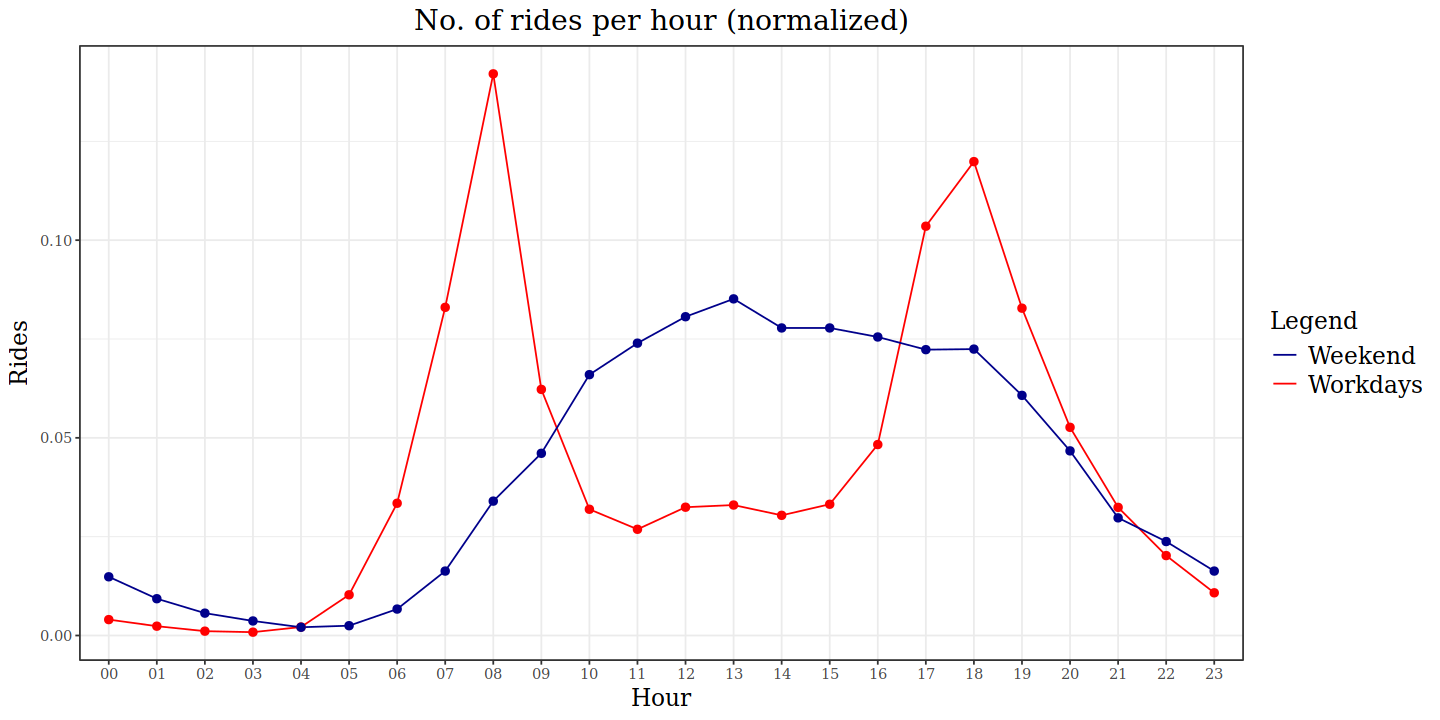

In [263]:
options(repr.plot.width = 12,repr.plot.height = 6)
p<-ggplot() + 
  geom_line(data=workdays_distribution, aes(x=X3, y=n,colour="Workdays",group=1))+
  geom_line(data=weekend_distribution, aes(x=X3, y=n,colour="Weekend",group=1))+
  geom_point(data=workdays_distribution, aes(x=X3, y=n,group=1),color="red",size=2)+
  geom_point(data=weekend_distribution, aes(x=X3, y=n,group=1),color="darkblue",size=2)+
  scale_color_manual(name = "Legend", values = c("Weekend" = "darkblue", "Workdays" = "red"))+
labs(
title="No. of rides per hour (normalized)",
y="Rides",
x="Hour"
)

#axis_legend()
p+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14),
                   legend.text=element_text(size=14),legend.title=element_text(size=14))+theme(text = element_text(family = "Times New Roman"))


**6.3)** Plot again the average hourly distribution on weekdays but separating customer and subscriber users

In [264]:
filehours<-cbind(file[,1],weekdays(strptime(file[,1:2][,2],"%Y-%m-%d %H:%M:%S"),abbreviate=TRUE),
                 format(strptime(file[,1:2][,2],"%Y-%m-%d %H:%M:%S"), format = "%H"),file[,13])
filehours<-data.frame(filehours)

filehours_workdays<-subset(filehours, filehours[,2]!="Sat")
filehours_workdays<-subset(filehours_workdays, filehours_workdays[,2]!="Sun")

filehours_workdays_sub<-subset(filehours_workdays, filehours_workdays[,4]=="Subscriber")
filehours_workdays_cust<-subset(filehours_workdays, filehours_workdays[,4]=="Customer")


workdays_distribution_sub<-filehours_workdays_sub%>% count(X3)
workdays_distribution_cust<-filehours_workdays_cust%>% count(X3)

workdays_tot_sub<-sum(workdays_distribution_sub[,2])
workdays_tot_cust<-sum(workdays_distribution_cust[,2])

workdays_distribution_sub[,2]<-workdays_distribution_sub[,2]/workdays_tot_sub
workdays_distribution_cust[,2]<-workdays_distribution_cust[,2]/workdays_tot_cust


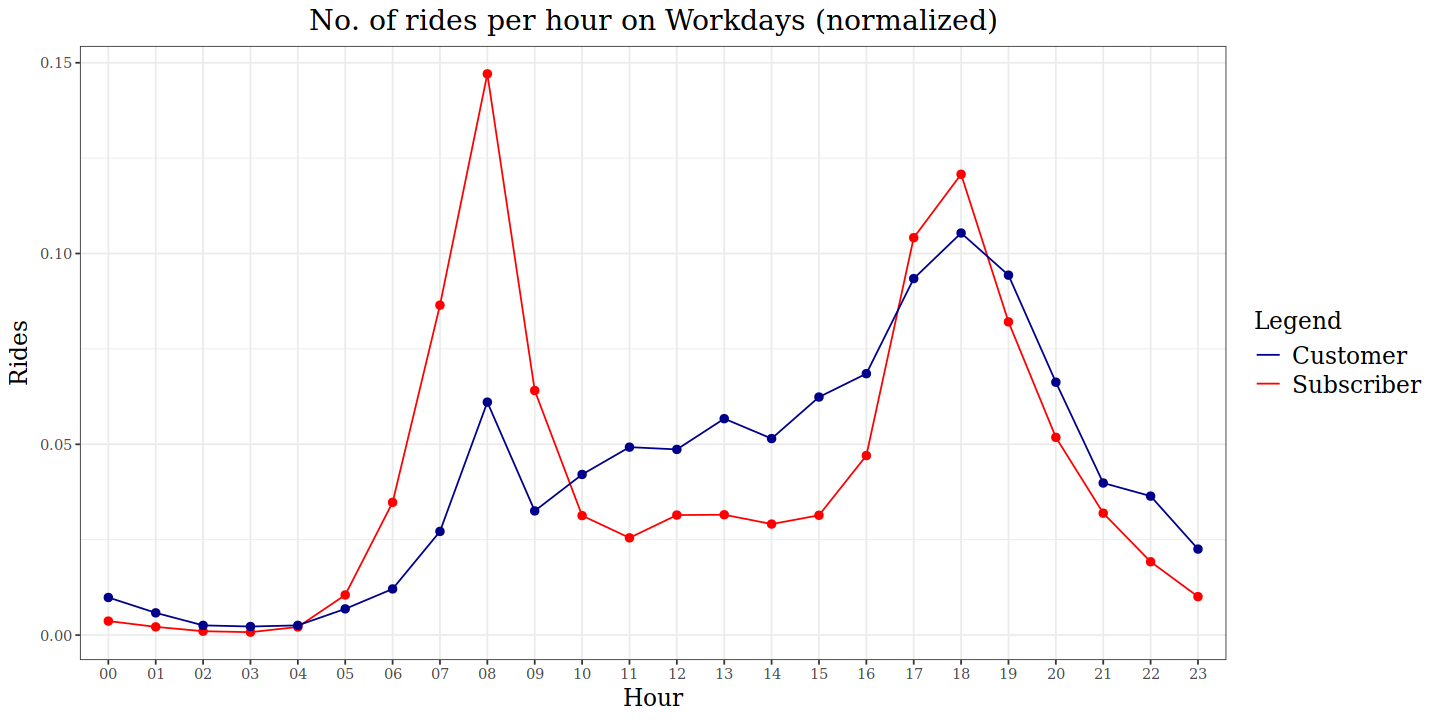

In [265]:
options(repr.plot.width = 12,repr.plot.height = 6)
p<-ggplot() + 
  geom_line(data=workdays_distribution_sub, aes(x=X3, y=n,colour="Subscriber",group=1))+
  geom_line(data=workdays_distribution_cust, aes(x=X3, y=n,colour="Customer",group=1))+
  geom_point(data=workdays_distribution_sub, aes(x=X3, y=n,group=1),color="red",size=2)+
  geom_point(data=workdays_distribution_cust, aes(x=X3, y=n,group=1),color="darkblue",size=2)+
  scale_color_manual(name = "Legend", values = c("Customer" = "darkblue", "Subscriber" = "red"))+
labs(
title="No. of rides per hour on Workdays (normalized)",
y="Rides",
x="Hour"
)

#axis_legend()
p+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14),
                   legend.text=element_text(size=14),legend.title=element_text(size=14))+theme(text = element_text(family = "Times New Roman"))


**7.1)** Using the latitude and longitude information, evaluate the average speed (in km/h) of a user, discarding the trip lasting longer than 1 hour

In [266]:
file_excl3<-file[,c(1,6,7,10,11)]
file_excl3<-file_excl3[file_excl3[,1]<=(60*60),]

In [267]:
radius=6378.1
dist_func<-function(lat1,long1,lat2,long2){
lat2<-(lat2/360)*2*pi
lat1<-(lat1/360)*2*pi
long2<-(long2/360)*2*pi
long1<-(long1/360)*2*pi
return (2.0*radius*asin(sqrt((1-cos(lat2-lat1)+cos(lat1)*cos(lat2)*(1-cos(long2-long1)))/2.0)))
}

In [268]:
distances<-data.frame(dist_func(file_excl3[,2],file_excl3[,3],file_excl3[,4],file_excl3[,5]))
colnames(distances)<-"distances"
speed<-data.frame((distances*3600)/file_excl3[,1])
colnames(speed)<-"speed"
file_excl3<-cbind(file_excl3,distances,speed)

In [269]:
file_excl3

,tripduration,start.station.latitude,start.station.longitude,end.station.latitude,end.station.longitude,distances,speed
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,142,40.71625,-74.03346,40.71925,-74.03423,0.3408255,8.640646
2,223,40.71625,-74.03346,40.71518,-74.03768,0.3757893,6.066553
3,106,40.71625,-74.03346,40.71415,-74.03355,0.2340684,7.949493
4,370,40.71625,-74.03346,40.72153,-74.04630,1.2328297,11.995099
5,315,40.71625,-74.03346,40.72165,-74.04288,0.9971125,11.395572
6,145,40.71625,-74.03346,40.71277,-74.03649,0.4633251,11.503243
7,1625,40.71625,-74.03346,40.71959,-74.04312,0.8956946,1.984308
8,485,40.71625,-74.03346,40.71959,-74.04312,0.8956946,6.648455
9,632,40.71625,-74.03346,40.72569,-74.04879,1.6664561,9.492471


**7.2)** Plot the average speed as a function of route length for the following group of distances d < 500 m,
500 m < d < 1000 m, 1000 m < d < 2000 m, 2000 m < d < 3000 m, d > 3000 m and discarding
trips longer than 1 hour

In [270]:
file_excl3_min_500<-file_excl3[file_excl3[,6]<=0.5,]
file_excl3_500_1000<-file_excl3[file_excl3[,6]>0.5 & file_excl3[,6]<=1.0,]
file_excl3_1000_2000<-file_excl3[file_excl3[,6]>1.0&file_excl3[,6]<=2.0,]
file_excl3_2000_3000<-file_excl3[file_excl3[,6]>2.0&file_excl3[,6]<=3.0,]
file_excl3_300_max<-file_excl3[file_excl3[,6]>3.0,]

In [271]:
distance<-c(250,750,1500,2500,3500)
average<-c(mean(file_excl3_min_500[,7]),mean(file_excl3_500_1000[,7]),mean(file_excl3_1000_2000[,7]),mean(file_excl3_2000_3000[,7]),mean(file_excl3_300_max[,7]))
averages_plot<-data.frame(distance,average)

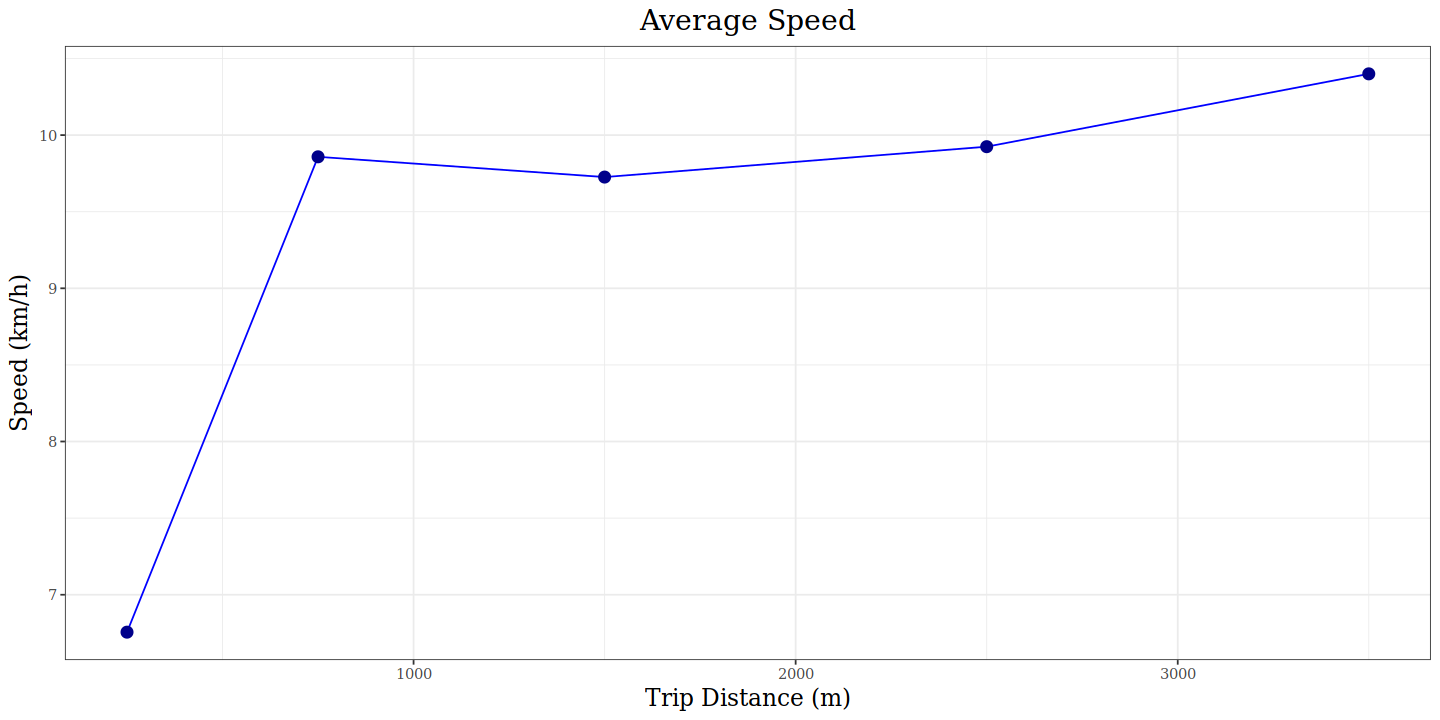

In [272]:
options(repr.plot.width = 12,repr.plot.height = 6)
p<-ggplot(data=averages_plot, aes(x=distance, y=average, group=1)) +
  geom_line(color="blue")+
  geom_point(color='darkblue',size=3)+
labs(
title="Average Speed",
y="Speed (km/h)",
x="Trip Distance (m)"
)

#axis_legend()
p+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14))+
theme(text = element_text(family = "Times New Roman"))


**7.3)** Repeat the same graph, but show the results obtained separately for weekdays and weekends

In [273]:
radius=6378.1
dist_func<-function(lat1,long1,lat2,long2){
lat2<-(lat2/360)*2*pi
lat1<-(lat1/360)*2*pi
long2<-(long2/360)*2*pi
long1<-(long1/360)*2*pi
return (2.0*radius*asin(sqrt((1-cos(lat2-lat1)+cos(lat1)*cos(lat2)*(1-cos(long2-long1)))/2.0)))
}

func_sec<-function(df){
file_excl3_min_500<-df[df[,7]<=0.5,]
file_excl3_500_1000<-df[df[,7]>0.5 & df[,7]<=1.0,]
file_excl3_1000_2000<-df[df[,7]>1.0 & df[,7]<=2.0,]
file_excl3_2000_3000<-df[df[,7]>2.0 & df[,7]<=3.0,]
file_excl3_3000_max<-df[df[,7]>3.0,]
distance<-c(250,750,1500,2500,3500)
average<-c(mean(file_excl3_min_500[,8]),mean(file_excl3_500_1000[,8]),mean(file_excl3_1000_2000[,8]),mean(file_excl3_2000_3000[,8]),mean(file_excl3_3000_max[,8]))
averages<-data.frame(distance,average)
return (averages)
}

In [274]:
day<-weekdays(strptime(file[,1:2][,2],"%Y-%m-%d %H:%M:%S"),abbreviate=TRUE)
filehours<-cbind(file[,c(1,6,7,10,11)],day)
filehours<-data.frame(filehours)
filehours<-filehours[filehours[,1]<=(60*60),]
distances<-data.frame(dist_func(filehours[,2],filehours[,3],filehours[,4],filehours[,5]))
colnames(distances)<-"distances"
speed<-data.frame((distances*3600)/filehours[,1])
colnames(speed)<-"speed"
filehours<-cbind(filehours,distances,speed)
filehours_weekend<-rbind(subset(filehours, filehours[,6]=="Sat"),subset(filehours, filehours[,6]=="Sun"))

filehours_workdays<-subset(filehours, filehours[,6]!="Sat")
filehours_workdays<-subset(filehours_workdays, filehours_workdays[,6]!="Sun")

averages_workdays<-func_sec(filehours_workdays)
averages_weekend<-func_sec(filehours_weekend)

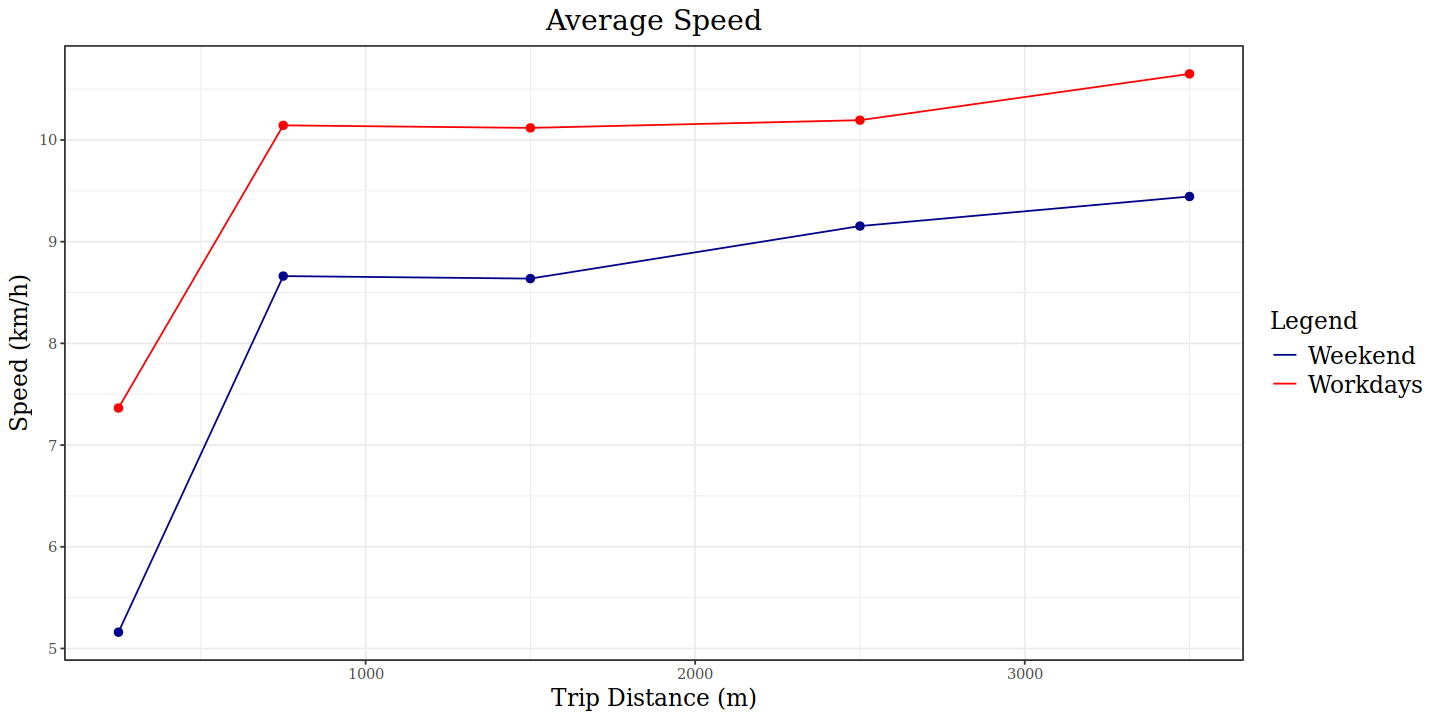

In [275]:
options(repr.plot.width = 12,repr.plot.height = 6)
p<-ggplot() + 
  geom_line(data=averages_workdays, aes(x=distance, y=average,colour="Workdays",group=1))+
  geom_line(data=averages_weekend, aes(x=distance, y=average,colour="Weekend",group=1))+
  geom_point(data=averages_workdays, aes(x=distance, y=average,group=1),color="red",size=2)+
  geom_point(data=averages_weekend, aes(x=distance, y=average,group=1),color="darkblue",size=2)+
  scale_color_manual(name = "Legend", values = c("Weekend" = "darkblue", "Workdays" = "red"))+
labs(
title="Average Speed",
y="Speed (km/h)",
x="Trip Distance (m)"
)

#axis_legend()
p+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14),
                   legend.text=element_text(size=14),legend.title=element_text(size=14))+theme(text = element_text(family = "Times New Roman"))


**8.1)** Find the most common start station and the least popular end station

In [276]:
startstations<-file %>% count(start.station.name,sort=TRUE)
cat("The most common start station is:",startstations[1,1])
cat("\nWith",startstations[1,2],"visits")



The most common start station is: Grove St PATH
With 17902 visits

In [277]:
endstations<-file %>% count(end.station.name,sort=TRUE)
cat("The least common end station is:",tail(endstations,n=1)[1,1])

The least common end station is: West St & Chambers St

**8.2)** Show the distribution of start stations

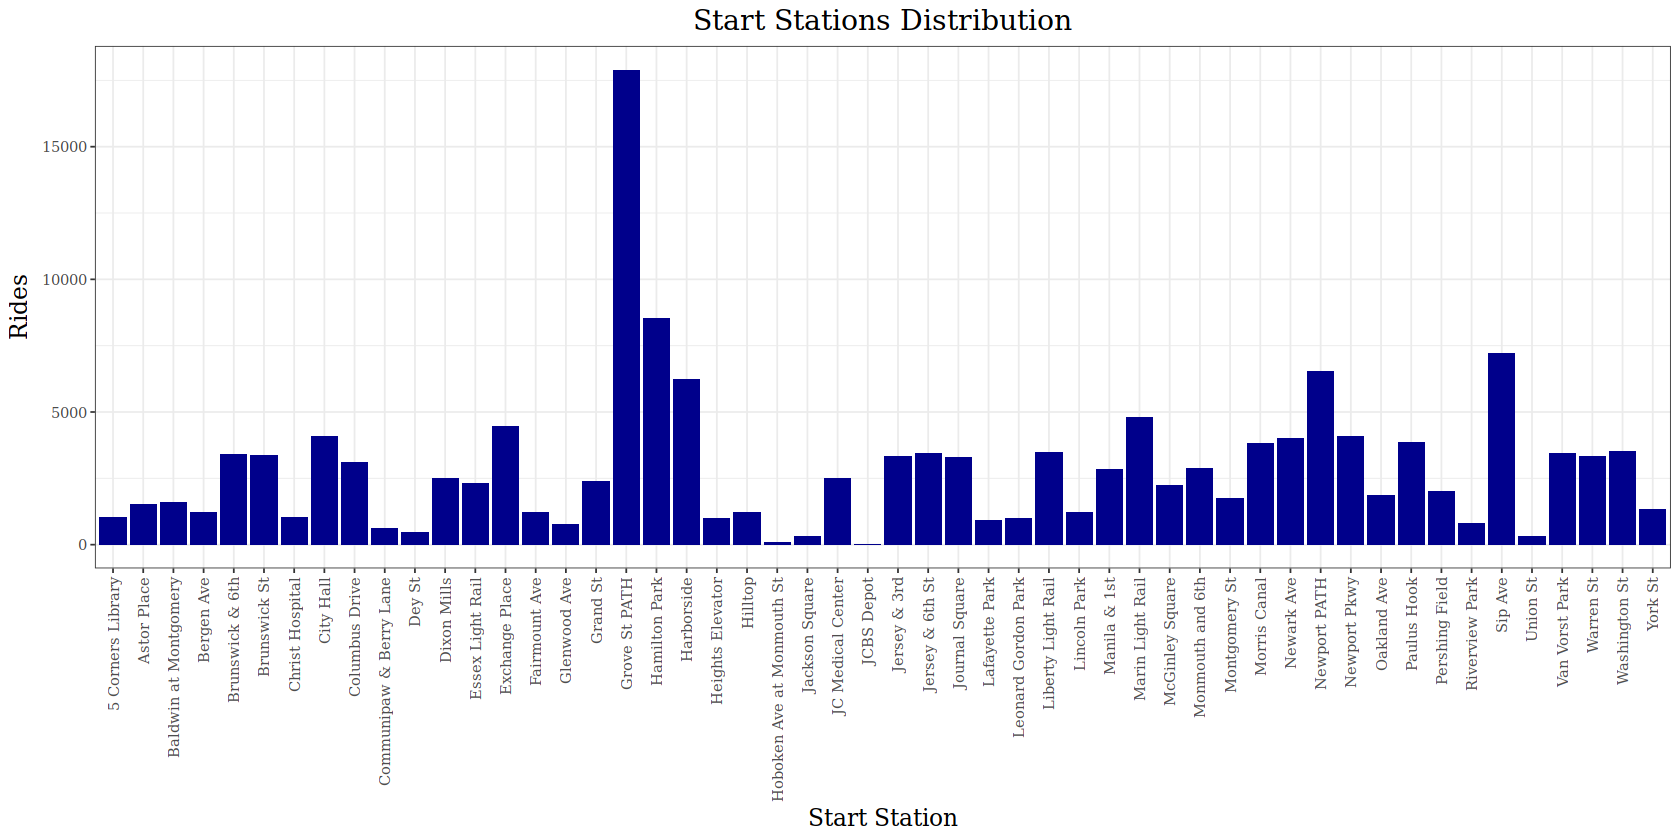

In [278]:
options(repr.plot.width = 14,repr.plot.height = 7)
p<-ggplot(startstations, aes(x=start.station.name, y=n)) + 
geom_bar(fill="darkblue",stat = "identity")+
labs(
title="Start Stations Distribution",
y="Rides",
x="Start Station"
)

#axis_legend()
p+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14),
                   axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+theme(text = element_text(family = "Times New Roman"))


**8.3)** Find the three most common routes (start and end station) and the three least popular ones

In [279]:
routes<-paste(file$start.station.name,file$end.station.name,sep="-")
file<-cbind(file,routes)
counted<-file%>%count(routes,sort=TRUE)

In [280]:
cat("The three most common routes are: ",counted[1,1],",",counted[2,1],"and",counted[3,1])
cat("\nWith",counted[1,2],",",counted[2,2],"and",counted[3,2],"rides respectively")


The three most common routes are:  Hamilton Park-Grove St PATH , Grove St PATH-Hamilton Park and Brunswick & 6th-Grove St PATH
With 3037 , 2318 and 1916 rides respectively

In [281]:
cat("The three least common routes are: ",tail(counted,n=3)[1,1],",",tail(counted,n=3)[2,1],"and",tail(counted,n=3)[3,1])
cat("\nWith",tail(counted,n=3)[1,2],"ride each")

The three least common routes are:  York St-Brunswick & 6th , York St-Communipaw & Berry Lane and York St-Lincoln Park
With 1 ride each